====================================
##### author: Ahmad Borzou
##### email: ahmad_borzou@baylor.edu
##### affiliation: Baylor University
##### twitter: @ahmadborzou
##### webpage: http://sites.baylor.edu/ahmad_borzou/
====================================

# solving a simple harmonic oscillator

We would like to find the position and speed of a ball attached to a spring with constant $k$. According to Hooke's law the force applied to the ball by the spring is $F=-kx$. Also, Newton's law says $F=m\frac{d^2x}{dt^2}$. 
Therefore, we need to solve
$m\frac{d^2x}{dt^2} = -k x$

In [1]:
## import the packages
import numpy as np

import sympy as sp
sp.init_printing()

from IPython.display import display

from bokeh.io import show, output_notebook, curdoc
from bokeh.plotting import figure
from bokeh.layouts import row,column, widgetbox
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Slider, Button, Paragraph

output_notebook()

Loading BokehJS ...

In [2]:
## introduce the symbols for analytic solution
x = sp.symbols('x',cls=sp.Function,real=True)
m,t,k = sp.symbols('m,t,k',real=True,positive=True)

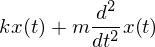

In [3]:
## Newton's law 
eq = m*sp.diff(x(t),t,2) + k*x(t)
display(eq)

This is the same equation as above. The right hand side of the equation is 0.

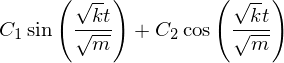

In [4]:
## get the solution
x_ = sp.dsolve(eq).rhs
x_

The speed is $v=\frac{dx}{dt}$

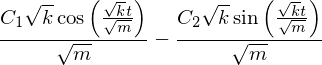

In [5]:
## the speed
v_ = sp.diff(x_,t)
v_

To move forward we need to determince $C_1$ and $C_2$ with initial conditions. Lets assume the ball is at $x=0$ at $t=0$ and maximum distance that the ball can go is 10.

In [6]:
## solve the first initial condition
c1,c2 = sp.symbols('C1,C2')
consts = sp.solve([x_.subs(t,0)],[c1,c2],dict=True)
display(consts)

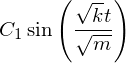

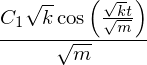

In [7]:
## substitute the constant 
x_ = x_.subs(c2,0)
v_ = v_.subs(c2,0)
display(x_)
display(v_)

the second initial condition implies that $C_1 = 10$

In [8]:
x_ = x_.subs(c1,10)
v_ = v_.subs(c1,10)

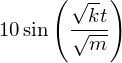

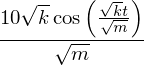

In [9]:
display(x_)
display(v_)

In [10]:
## convert analytic solutions to numeric ones
x = sp.lambdify((m,k,t),x_)
v = sp.lambdify((m,k,t),v_)

angular frequency is $\omega = \sqrt{\frac{k}{m}} = 2\pi \nu = \frac{2\pi}{T}$ where $\nu$ is the frequency
and the period is
$T = 2\pi \sqrt{\frac{m}{k}}$

In [11]:
## let's give some values to m and k and plot the postion and speed as a function of time
m=1.
k=2
T = 2*np.pi*np.sqrt(m/k) ## the period
t = np.linspace(0,2*T,1000)
x_arr = x(m,k,t)
v_arr = v(m,k,t)

plot = figure(plot_height=300,plot_width=800,y_range=(-15,15))
plot.line(t,x_arr,legend='x')
plot.line(t,v_arr,color='red',legend='v')
plot.vbar([0],0.05,[10],[-10],color='black')
plot.xaxis.axis_label = 'Time (s)'
show(plot)

Finally lets visualize it. In the following you can change the value of mass and spring constant and observe how the ball oscillates with time. The speed and frequency are also shown at each time.

In [12]:
def modifydoc(doc):
    
    m = Slider(title='mass (kg)',value=1,start=1,end=10,step=1)
    k = Slider(title='spring constant (N/m)',value=2,start=1,end=10,step=1)
    button = Button(label='run')
    paragraph = Paragraph()
    paragraph2 = Paragraph()
    paragraph3 = Paragraph()
    source = ColumnDataSource(data=dict(x=[x(m.value,k.value,0)],v=[v(m.value,k.value,0)]))

    plot2 = figure(plot_height=300,plot_width=600,x_range=(-15,15),y_range=(-2,2))
    plot2.vbar([0],0.05,[5],[-5],color='black')
    plot2.circle('x',0,source=source,size=15,color='green')
    plot2.hbar(0,0.01,'x',0,source=source)        
    plot2.xaxis.axis_label = 'position'
    
    
#     def update_data(attr, old, new): 
#         data=dict(
#             x=[x(m.value,k.value,t_)],
#             v=[v(m.value,k.value,t_)]
#         )
#         source.data = data

#     for i in [m,k]:
#         i.on_change('value',update_data)

    def update(): 
        deltaT = 0.01 # seconds
        EndTime = 10 # seconds
        Nloops = EndTime/deltaT
        ts = np.linspace(0,EndTime,int(Nloops))    
        for t_ in ts:
            data=dict(
                x=[x(m.value,k.value,t_)],
                v=[v(m.value,k.value,t_)]
            )
            source.data = data
            paragraph.text  = "\n time (s): %g"%(t_)
            paragraph2.text = "speed (m/s): %g"%(v(m.value,k.value,t_))
            paragraph3.text = "frequency (1/s): %g"%(np.sqrt(float(k.value)/m.value)/(2*np.pi))
            

            
    button.on_click(update)
    doc.add_root(row(widgetbox(m,k,button,paragraph,paragraph2,paragraph3),plot2))
    
show(modifydoc)